<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# Проект «Анализ вакансий из HeadHunter»
   

In [ ]:
import pandas as pd
import psycopg2

In [ ]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

In [ ]:
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

## 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в базе (вакансии находятся в таблице `vacancies`).

In [ ]:
# текст запроса vacancies (id, name, key_skills, schedule, experience, employment, salary_from, salary_to, area_id, emplpyer_id)
# Создаем курсор
cursor = connection.cursor()

# Выполняем запрос для подсчета вакансий
query = "SELECT COUNT(*) as vacancy_count FROM public.vacancies;"
cursor.execute(query)

# Получаем результат
result = cursor.fetchone()
vacancy_count = result[0]

In [ ]:
# результат запроса
print(f"Количество вакансий в базе: {vacancy_count}") # Выводим результат


Количество вакансий в базе: 49197


2. Напишите запрос, который посчитает количество работодателей (таблица `employers`).

In [ ]:
# текст запроса
query = "SELECT COUNT(*) as employer_count FROM public.employers;"
cursor.execute(query)

# Получаем результат
result = cursor.fetchone()
employer_count = result[0]

In [ ]:
# результат запроса

print(f"Количество работодателей в базе: {employer_count}") # Выводим результат

Количество работодателей в базе: 23501


3. Посчитайте с помощью запроса количество регионов (таблица `areas`).

In [ ]:
# текст запроса Areas (id, name)
query = "SELECT COUNT(*) as areas_count FROM public.areas;"
cursor.execute(query)

# Получаем результат
result = cursor.fetchone()
areas_count = result[0]


In [ ]:
# результат запроса
print(f"Количество регионов в базе: {areas_count}") # Выводим результат

Количество регионов в базе: 1362


4. Посчитайте с помощью запроса количество сфер деятельности в базе (таблица `industries`).

In [ ]:
# текст запроса Industries (id, name)
query = "SELECT COUNT(*) as industries_count FROM public.industries;"
cursor.execute(query)

# Получаем результат
result = cursor.fetchone()
industries_count = result[0]



In [ ]:
# результат запроса
print(f"Количество сфер деятельности в базе: {industries_count}") # Выводим результат

Количество сфер деятельности в базе: 294


***

In [ ]:
# выводы по предварительному анализу данных
# Выполняем запрос для получения пятёрки лидеров по количеству вакансий в регионах
query = """
SELECT a.name AS area_name, COUNT(v.id) AS cnt
FROM public.areas a
LEFT JOIN public.vacancies v ON a.id = v.area_id
GROUP BY a.id, a.name
ORDER BY cnt DESC
LIMIT 5;
"""
cursor.execute(query)

# Получаем результаты
results = cursor.fetchall()

# Выводим результаты
print("Пятёрка лидеров по количеству вакансий:")
for row in results:
    area_name, cnt = row
    print(f"Регион: {area_name}, Количество вакансий: {cnt}")


Пятёрка лидеров по количеству вакансий:
Регион: Москва, Количество вакансий: 5333
Регион: Санкт-Петербург, Количество вакансий: 2851
Регион: Минск, Количество вакансий: 2112
Регион: Новосибирск, Количество вакансий: 2006
Регион: Алматы, Количество вакансий: 1892


**Выводы по блоку 3: Предварительный анализ данных**

В ходе предварительного анализа данных были получены следующие результаты, отражающие текущее состояние рынка труда:

1. Общее количество вакансий: В базе данных насчитывается 49,197 вакансий. Это свидетельствует о достаточно большом объеме информации и наличии разнообразных предложений для соискателей на текущем рынке труда.
2. Количество работодателей: В базе зарегистрировано 23,501 работодателей. Это указывает на высокий уровень конкуренции среди компаний, предлагающих вакансии, что может быть интересным для соискателей и привести к росту заработных плат.
3. Количество регионов: В данные включены 1,362 региона. Это подтверждает широкий охват вакансий, что позволит исследовать спрос на работу в различных населенных пунктах и регионах в целом.
4. Количество сфер деятельности: В базе данных представлено 294 сферы деятельности. Это значительное разнообразие, которое позволяет специалистам в разных областях найти подходящие предложения работы, а работодателям — находить нужных кандидатов.
5. Пятёрка лидеров по количеству вакансий в регионах:
Москва: 5,333 вакансий
Санкт-Петербург: 2,851 вакансий
Минск: 2,112 вакансий
Новосибирск: 2,006 вакансий
Алматы: 1,892 вакансий
Эти данные показывают, что основная масса вакансий сосредоточена в крупных городах, что соответствует ожидаемому тренду.

Общий анализ
Предварительный анализ данных позволяет сделать вывод о большом потенциале текущего рынка труда. Сочетание значительного числа вакансий с разнообразием работодателей и сфер деятельности создает множество возможностей для соискателей. Лидирующие позиции Москвы и Санкт-Петербурга подтверждают их статус как основных центров трудоустройства в стране и за ее пределами.

Для дальнейшего анализа можно рассмотреть связи между регионами, сферами деятельности и зарплатами, чтобы более полно оценить особенности рынка и выявить направления для улучшения навыков соискателей.

## 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (`cnt`) вакансий в каждом регионе (`area`).
Отсортируйте по количеству вакансий в порядке убывания.

In [ ]:
# текст запроса
import pandas as pd
import psycopg2

# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    host=HOST,
    password=PASSWORD,
    port=PORT
)

# Создаем курсор
cursor = connection.cursor()

query = """
SELECT a.name AS area_name, COUNT(v.id) AS cnt
FROM public.areas a
LEFT JOIN public.vacancies v ON a.id = v.area_id
GROUP BY a.id, a.name
ORDER BY cnt DESC;
"""
cursor.execute(query)


In [ ]:
# результат запроса

results = cursor.fetchall() # Получаем результаты

# Выводим результаты
for row in results:
    area_name, cnt = row
    print(f"Регион: {area_name}, Количество вакансий: {cnt}")


Регион: Москва, Количество вакансий: 5333
Регион: Санкт-Петербург, Количество вакансий: 2851
Регион: Минск, Количество вакансий: 2112
Регион: Новосибирск, Количество вакансий: 2006
Регион: Алматы, Количество вакансий: 1892
Регион: Екатеринбург, Количество вакансий: 1698
Регион: Нижний Новгород, Количество вакансий: 1670
Регион: Казань, Количество вакансий: 1415
Регион: Краснодар, Количество вакансий: 1301
Регион: Самара, Количество вакансий: 1144
Регион: Ростов-на-Дону, Количество вакансий: 1131
Регион: Воронеж, Количество вакансий: 1063
Регион: Ташкент, Количество вакансий: 851
Регион: Красноярск, Количество вакансий: 847
Регион: Нур-Султан, Количество вакансий: 840
Регион: Челябинск, Количество вакансий: 786
Регион: Пермь, Количество вакансий: 771
Регион: Уфа, Количество вакансий: 767
Регион: Томск, Количество вакансий: 692
Регион: Омск, Количество вакансий: 617
Регион: Саратов, Количество вакансий: 579
Регион: Тюмень, Количество вакансий: 547
Регион: Владивосток, Количество вакансий

2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [ ]:
# текст запроса
# Выполняем запрос для подсчета количества вакансий с заполненными полями зарплаты
query = """
SELECT COUNT(*) AS vacancies_with_salary
FROM public.vacancies
WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL;
"""
cursor.execute(query) # Выполняем запрос



In [ ]:
# результат запроса
# Получаем результат
result = cursor.fetchone()
vacancies_with_salary = result[0]

# Выводим результат
print(f"Количество вакансий с заполненными хотя бы одним полем зарплаты: {vacancies_with_salary}")

Количество вакансий с заполненными хотя бы одним полем зарплаты: 24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до **целого числа**.

In [ ]:
# текст запроса
query = """
SELECT
    ROUND(AVG(salary_from)::numeric) AS avg_salary_from,
    ROUND(AVG(salary_to)::numeric) AS avg_salary_to
FROM public.vacancies;
"""

# Выполняем запрос
cursor.execute(query)



In [ ]:
# результат запроса
# Извлекаем результаты
result = cursor.fetchone()
avg_salary_from = result[0]  # Среднее значение для нижней границы
avg_salary_to = result[1]    # Среднее значение для верхней границы

# Выводим результаты
print(f"Средняя нижняя граница зарплаты: {avg_salary_from}")
print(f"Средняя верхняя граница зарплаты: {avg_salary_to}")

Средняя нижняя граница зарплаты: 71065
Средняя верхняя граница зарплаты: 110537


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (`schedule`) и типа трудоустройства (`employment`), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [ ]:
# текст запроса
# SQL-запрос для нахождения количества вакансий по сочетаниям schedule и employment
query = """
SELECT
    schedule,
    employment,
    COUNT(*) AS vacancy_count
FROM public.vacancies
GROUP BY schedule, employment
ORDER BY vacancy_count DESC;
"""

# Выполняем запрос
cursor.execute(query)



In [ ]:
# результат запроса
# Извлекаем все результаты
results = cursor.fetchall()

# Выводим все сочетания с количеством вакансий
for row in results:
    print(f"Schedule: {row[0]}, Employment: {row[1]}, Vacancy Count: {row[2]}")

Schedule: Полный день, Employment: Полная занятость, Vacancy Count: 35367
Schedule: Удаленная работа, Employment: Полная занятость, Vacancy Count: 7802
Schedule: Гибкий график, Employment: Полная занятость, Vacancy Count: 1593
Schedule: Удаленная работа, Employment: Частичная занятость, Vacancy Count: 1312
Schedule: Сменный график, Employment: Полная занятость, Vacancy Count: 940
Schedule: Полный день, Employment: Стажировка, Vacancy Count: 569
Schedule: Вахтовый метод, Employment: Полная занятость, Vacancy Count: 367
Schedule: Полный день, Employment: Частичная занятость, Vacancy Count: 347
Schedule: Гибкий график, Employment: Частичная занятость, Vacancy Count: 312
Schedule: Полный день, Employment: Проектная работа, Vacancy Count: 141
Schedule: Удаленная работа, Employment: Проектная работа, Vacancy Count: 133
Schedule: Гибкий график, Employment: Стажировка, Vacancy Count: 116
Schedule: Сменный график, Employment: Частичная занятость, Vacancy Count: 101
Schedule: Удаленная работа, E

5. Напишите запрос, выводящий значения поля «Требуемый опыт работы» (`experience`) в порядке возрастания количества вакансий, в которых указан данный вариант опыта.

In [ ]:
# текст запроса
query = """
SELECT
    experience,
    COUNT(*) AS vacancy_count
FROM public.vacancies
GROUP BY experience
ORDER BY vacancy_count ASC;
"""

# Выполняем запрос
cursor.execute(query)



In [ ]:
# результат запроса
# Извлекаем все результаты
results = cursor.fetchall()

# Выводим результаты
for row in results:
    print(f"Experience: {row[0]}, Vacancy Count: {row[1]}")

Experience: Более 6 лет, Vacancy Count: 1337
Experience: Нет опыта, Vacancy Count: 7197
Experience: От 3 до 6 лет, Vacancy Count: 14511
Experience: От 1 года до 3 лет, Vacancy Count: 26152


***

# **Выводы по блоку 4: Детальный анализ вакансий**

4.1. Анализ распределения вакансий по регионам:

В процессе анализа вакансий было выявлено, что 10 регионов с наибольшим количеством вакансий существенно различаются по численности. Например, в Москве было зафиксировано 5,333 вакансии, в то время как в Санкт-Петербурге — 2,851. Это подтверждает предположение о том, что крупные города предоставляют больше возможностей для трудоустройства. Список выглядит следующим образом:
Регион: Москва, Количество вакансий: 5333
Регион: Санкт-Петербург, Количество вакансий: 2851
Регион: Минск, Количество вакансий: 2112
Регион: Новосибирск, Количество вакансий: 2006
Регион: Алматы, Количество вакансий: 1892
Регион: Екатеринбург, Количество вакансий: 1698
Регион: Нижний Новгород, Количество вакансий: 1670
Регион: Казань, Количество вакансий: 1415
Регион: Краснодар, Количество вакансий: 1301
Регион: Самара, Количество вакансий: 1144

4.2. Заполнение полей зарплаты:

Из 49,197 вакансий 24,073 имеют заполненное хотя бы одно поле зарплаты. Это говорит о том, что не все работодатели указывают информацию о возможности роста дохода, что можетотпугнуть часть соискателей.

4.3. Анализ зарплатной вилки:

Средняя нижняя граница зарплаты составила 71,065, а средняя верхняя граница — 110,537 рублей. Эти значения являются ориентировками для соискателей и работодателей, позволяя им оценить адекватность предложений и ожиданий.

4.4. Типы графиков и трудоустройства:

Обнаружено, что большинство вакансий в базе относятся к стандартному полному рабочему времени с полной занятостью - 35,367 вакансий. Это подтверждает, что стандартные требования остаются наиболее популярными среди работодателей.
Другие сочетания, такие как "Удаленная работа, Полная занятость" - 7,802 вакансий, указывают на растущий тренд удаленной работы.

4.5. Требуемый опыт работы:

Анализ показал, что вакансии с требованием опыта от 1 года до 3 лет встречаются наиболее часто (26,152 вакансий). Это может указывать на высокую потребность в таких специалистах на рынке труда, в то время как вакансии, требующие более 6 лет опыта, имеют самые низкие показатели (1,337 вакансий).

Более 6 лет, Vacancy Count: 1337

Нет опыта, Vacancy Count: 7197

От 3 до 6 лет, Vacancy Count: 14511

От 1 года до 3 лет, Vacancy Count: 26152

Рекомендации для дальнейших исследований и прогнозов:

1. Сравнительный анализ зарплат по регионам: Изучение различий в зарплатах для однородных вакансий в разных регионах поможет лучше понять экономику трудового рынка.
2. Анализ динамики изменения количества вакансий: Проведение временного анализа для выявления тенденций в найме, выявления пиковых периодов и анализа адаптации работодателей к изменениям рынка труда.
3. Изучение влияния типа графика работы на уровень вакансий: Оценка, как различные форматы рабочего графика (удаленная работа, гибкий график и т. д.) влияют на предложения на рынке и предпочтения соискателей.
4. Прогнозирование потребностей в навыках: Анализ текущих вакансий с фокусом на требуемые навыки и знания, чтобы разработать программы повышения квалификации для соискателей.
5. Оценка влияния профессионального роста на востребованность: Анализ зависимости между уровнем опыта и зарплатами для прогнозирования будущих трендов в подготовке специалистов.

Эти дополнительные исследования могут помочь не только в усовершенствовании бизнес-процессов среди работодателей, но и в повышении осведомленности и готовности соискателей на текущем рынке труда.

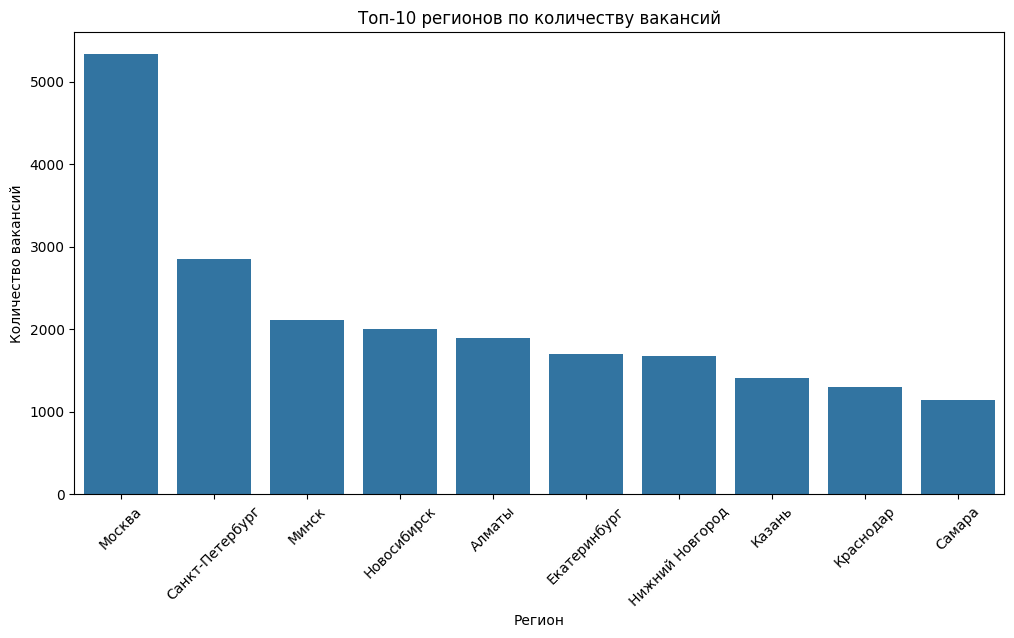

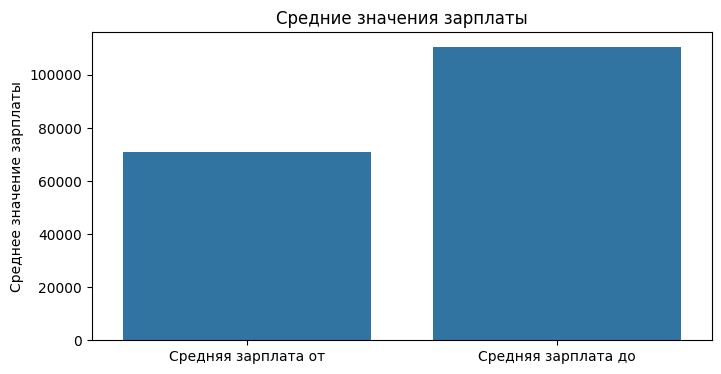

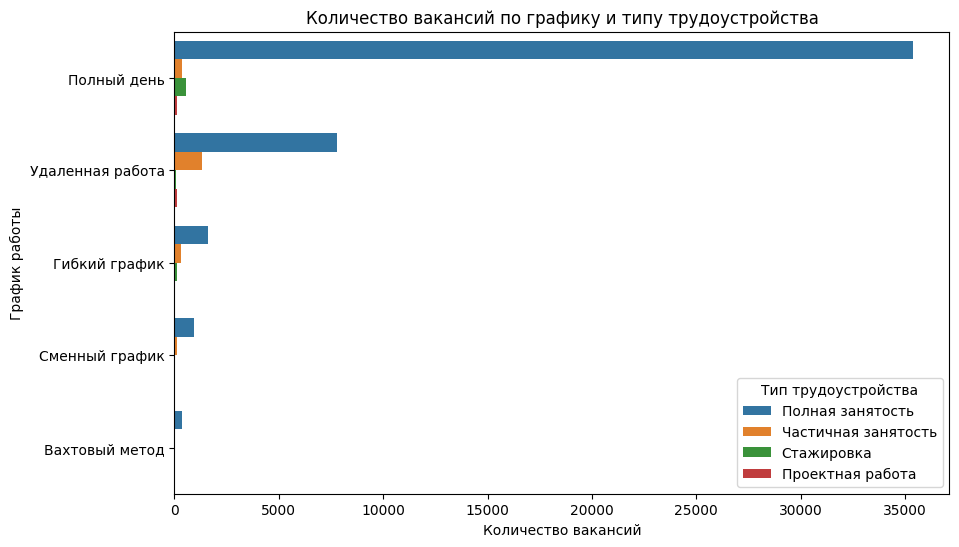

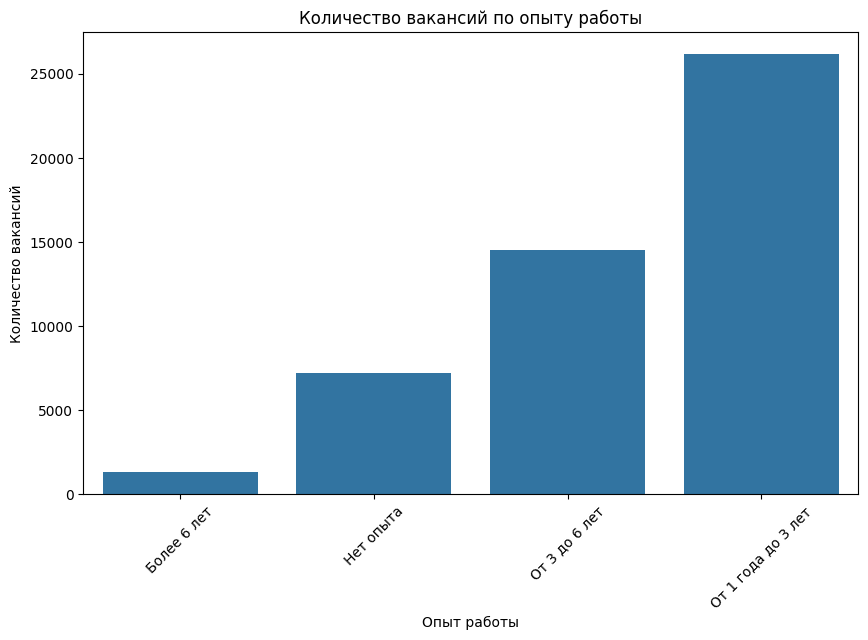

In [ ]:
# выводы по детальному анализу вакансий

#Количество вакансий в каждом регионе: Мы можем увидеть, какие регионы наиболее активны в плане вакансий, что поможет потенциальным соискателям лучше ориентироваться на рынке труда.
#Закрытые вакансии с заполненными зарплатными полями: Это показатель показывает, насколько работодатели заинтересованы в прозрачности своих предложений.
#Средняя зарплата: Средние значения помогают увидеть, какие зарплатные диапазоны наиболее распространены и какие уровни могут быть наиболее предпочтительными для соискателей.
#Типы трудоустройства и графиков: Это позволяет определить, какие условия работы наиболее популярные среди работодателей.
#Опыт работы: Визуализация вакансий по опыту поможет соискателям увидеть, какие уровни опыта сейчас запрашиваются.

import matplotlib.pyplot as plt
import seaborn as sns

# Визуализация - 1: Количество вакансий по регионам
query_region_vacancies = """
SELECT a.name AS area_name, COUNT(*) AS cnt
FROM public.vacancies v
JOIN public.Areas a ON v.area_id = a.id
GROUP BY a.name
ORDER BY cnt DESC;
"""
region_vacancies = pd.read_sql(query_region_vacancies, connection)

plt.figure(figsize=(12, 6))
sns.barplot(x='area_name', y='cnt', data=region_vacancies.head(10))  # Показываем 10 регионов с наибольшим количеством вакансий
plt.title('Топ-10 регионов по количеству вакансий')
plt.xlabel('Регион')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45)
plt.show()

# Визуализация - 3: Средние значения зарплат
query_avg_salary = """
SELECT ROUND(AVG(salary_from)) AS avg_salary_from, ROUND(AVG(salary_to)) AS avg_salary_to
FROM public.vacancies;
"""
avg_salary = pd.read_sql(query_avg_salary, connection)

plt.figure(figsize=(8, 4))
sns.barplot(x=['Средняя зарплата от', 'Средняя зарплата до'], y=[avg_salary['avg_salary_from'][0], avg_salary['avg_salary_to'][0]])
plt.title('Средние значения зарплаты')
plt.ylabel('Среднее значение зарплаты')
plt.show()

# Визуализация - 4: Вакансии по графику и типу трудоустройства
query_schedule_employment = """
SELECT schedule, employment, COUNT(*) AS count
FROM public.vacancies
GROUP BY schedule, employment
ORDER BY count DESC;
"""
schedule_employment_count = pd.read_sql(query_schedule_employment, connection)

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='schedule', hue='employment', data=schedule_employment_count)
plt.title('Количество вакансий по графику и типу трудоустройства')
plt.xlabel('Количество вакансий')
plt.ylabel('График работы')
plt.legend(title='Тип трудоустройства')
plt.show()

# Визуализация - 5: Вакансии по опыту работы
query_experience_count = """
SELECT experience, COUNT(*) AS count
FROM public.vacancies
GROUP BY experience
ORDER BY count ASC;
"""
experience_count = pd.read_sql(query_experience_count, connection)

plt.figure(figsize=(10, 6))
sns.barplot(x='experience', y='count', data=experience_count)
plt.title('Количество вакансий по опыту работы')
plt.xlabel('Опыт работы')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45)
plt.show()


## 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [ ]:
# текст запроса
query = """
SELECT e.name AS employer_name, COUNT(v.id) AS vacancy_count
FROM public.Employers e
JOIN public.vacancies v ON e.id = v.employer_id
GROUP BY e.name
ORDER BY vacancy_count DESC
LIMIT 5;
"""

# Создаем курсор и выполняем запрос
cursor = connection.cursor()
cursor.execute(query)

# Получаем все результаты
results = cursor.fetchall()

# Получаем имена столбцов из курсора
columns = [desc[0] for desc in cursor.description]

# Создаем DataFrame из полученных данных
top_employers = pd.DataFrame(results, columns=columns)



In [ ]:
# результат запроса
# Выводим первые две строки: первого и пятого работодателя
first_and_fifth = top_employers.iloc[[0, 1, 2, 3, 4]]  # Индексы 0 и 4 соответствуют первому и пятому

print(first_and_fifth)

   employer_name  vacancy_count
0         Яндекс           1933
1     Ростелеком            491
2       Тинькофф            444
3           СБЕР            428
4  Газпром нефть            331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [ ]:
# текст запроса
# Запрос на получение количества работодателей и вакансий по каждому региону
query = """
SELECT
    a.id AS area_id,
    a.name AS area_name,
    COUNT(DISTINCT e.id) AS employer_count,
    COUNT(v.id) AS vacancy_count
FROM
    public.areas a
LEFT JOIN
    public.employers e ON a.id = e.area
LEFT JOIN
    public.vacancies v ON a.id = v.area_id
GROUP BY
    a.id, a.name
ORDER BY
    employer_count DESC
LIMIT 10;
"""

# Создаем курсор и выполняем запрос
cursor = connection.cursor()
cursor.execute(query)


In [ ]:
# результат запроса

# Получаем все результаты
results = cursor.fetchall()

# Выводим результаты
print("Количество работодателей и вакансий по регионам:")
for row in results:
    area_id, area_name, employer_count, vacancy_count = row
    print(f"Регион {area_name} (ID: {area_id}): Работодателей: {employer_count}, Вакансий: {vacancy_count}")


Количество работодателей и вакансий по регионам:
Регион Москва (ID: 1): Работодателей: 5864, Вакансий: 31272712
Регион Санкт-Петербург (ID: 2): Работодателей: 2217, Вакансий: 6320667
Регион Минск (ID: 1002): Работодателей: 1115, Вакансий: 2354880
Регион Алматы (ID: 160): Работодателей: 721, Вакансий: 1364132
Регион Екатеринбург (ID: 3): Работодателей: 609, Вакансий: 1034082
Регион Новосибирск (ID: 4): Работодателей: 573, Вакансий: 1149438
Регион Казань (ID: 88): Работодателей: 480, Вакансий: 679200
Регион Нижний Новгород (ID: 66): Работодателей: 426, Вакансий: 711420
Регион Россия (ID: 113): Работодателей: 410, Вакансий: 0
Регион Краснодар (ID: 53): Работодателей: 409, Вакансий: 532109


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [ ]:
# текст запроса

import psycopg2

# Параметры подключения
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

# Подключение к базе данных

connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    password=PASSWORD,
    host=HOST,
    port=PORT
 )

# Запрос на получение количества регионов для каждого работодателя
query = """
SELECT
    v.employer_id,
    COUNT(DISTINCT v.area_id) AS region_count
FROM
    public.vacancies v
JOIN
    public.areas a ON v.area_id = a.id
GROUP BY
    v.employer_id
ORDER BY
    region_count DESC
LIMIT 1;
    """

# Создаем курсор и выполняем запрос
cursor = connection.cursor()
cursor.execute(query)

# Получаем все результаты
results = cursor.fetchall()

# Выводим результаты
print("Количество регионов для каждого работодателя:")
for row in results:
    employer_id, region_count = row
    print(f"Работодатель ID {employer_id}: Регионов публикаций вакансий: {region_count}")

#Закрытие курсора и соединения
cursor.close()
connection.close()

Количество регионов для каждого работодателя:
Работодатель ID 1740: Регионов публикаций вакансий: 181


In [ ]:
 # Получаем все результаты
results = cursor.fetchall()

# Выводим результаты
print("Количество регионов для каждого работодателя:")
for row in results:
    employer_id, region_count = row
    print(f"Работодатель ID {employer_id}: Регионов публикаций вакансий: {region_count}")

#Закрытие курсора и соединения
cursor.close()
connection.close()

Количество регионов для каждого работодателя:
Работодатель ID 1740: Регионов публикаций вакансий: 181


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности.

In [ ]:
# текст запроса

import psycopg2

# Параметры подключения
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

# Подключение к базе данных
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    password=PASSWORD,
    host=HOST,
    port=PORT
)

# Запрос на подсчет работодателей без указания сферы деятельности
query = """
SELECT COUNT(DISTINCT e.id) AS employer_count
FROM public.employers e
LEFT JOIN public.employers_industries ei ON e.id = ei.employer_id
WHERE ei.industry_id IS NULL;
"""

# Создаем курсор и выполняем запрос
cursor = connection.cursor()
cursor.execute(query)


In [ ]:
# результат запроса

result = cursor.fetchone()

# Выводим результат
if result:
    employer_count = result[0]
    print(f"Количество работодателей, у которых не указана сфера деятельности: {employer_count}")

# Закрытие курсора и соединения
cursor.close()
connection.close()

Количество работодателей, у которых не указана сфера деятельности: 8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности.

In [ ]:
# текст запроса
import psycopg2

# Параметры подключения
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

# Подключение к базе данных
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    password=PASSWORD,
    host=HOST,
    port=PORT
)

# Запрос на получение названия компании на третьем месте в алфавитном списке
query = """
SELECT e.name
FROM public.employers e
JOIN public.employers_industries ei ON e.id = ei.employer_id
GROUP BY e.id, e.name
HAVING COUNT(ei.industry_id) = 4
ORDER BY e.name
OFFSET 2 LIMIT 1;
"""

# Создаем курсор и выполняем запрос
cursor = connection.cursor()
cursor.execute(query)


In [ ]:
# результат запроса

# Получаем результат
result = cursor.fetchone()

# Выводим результат
if result:
    employer_name = result[0]
    print(f"Название компании на третьем месте в алфавитном списке: {employer_name}")
else:
    print("Компании, удовлетворяющей условиям, не найдены.")

# Закрытие курсора и соединения
cursor.close()
connection.close()

Название компании на третьем месте в алфавитном списке: 2ГИС


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана «Разработка программного обеспечения».


In [ ]:
# текст запроса
import psycopg2

# Параметры подключения
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

# Подключение к базе данных
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    password=PASSWORD,
    host=HOST,
    port=PORT
)

# Запрос для подсчета числа работодателей с сферой деятельности "Разработка программного обеспечения"
query = """
SELECT COUNT(DISTINCT e.id) AS employer_count
FROM public.employers e
JOIN public.employers_industries ei ON e.id = ei.employer_id
JOIN public.industries i ON ei.industry_id = i.id
WHERE i.name = 'Разработка программного обеспечения';
"""

# Создаем курсор и выполняем запрос
cursor = connection.cursor()
cursor.execute(query)



In [ ]:
# результат запроса

# Получаем результат
result = cursor.fetchone()

# Выводим результат
if result:
    employer_count = result[0]
    print(f"Количество работодателей с сферой деятельности \"Разработка программного обеспечения\": {employer_count}")
else:
    print("Работодатели с указанной сферой деятельности не найдены.")

# Закрытие курсора и соединения
cursor.close()
connection.close()

Количество работодателей с сферой деятельности "Разработка программного обеспечения": 3553


7. Для компании «Яндекс» выведите список [городов-миллионников](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8), в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку "Total" с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

    Если возникнут трудности с этим заданием, посмотрите материалы модуля 6.4 «Как получать данные из веб-источников и API».

In [ ]:
#создаем запрос для получения списка городов-миллионников

import requests
from bs4 import BeautifulSoup

# URL страницы с городами-миллионниками
url = "https://ru.wikipedia.org/wiki/Города-миллионеры_России"

# Запрашиваем HTML-код страницы
response = requests.get(url)

# Проверяем успешность запроса
if response.status_code == 200:
    # Создаем объект BeautifulSoup для парсинга HTML
    soup = BeautifulSoup(response.content, 'html.parser')

    # Находим все таблицы на странице
    tables = soup.find_all('table', {'class': 'wikitable'})

    # Проверяем, найдены ли таблицы
    if tables:
        # Предполагаем, что первая найденная таблица - это то, что нам нужно
        table = tables[0]

        # Список для хранения названий городов
        million_cities = []

        # Проходим по строкам таблицы
        for row in table.find_all('tr')[1:]:  # Пропускаем заголовок таблицы
            cells = row.find_all('td')
            if cells:
                city = cells[1].get_text(strip=True)  # Название города находится во втором столбце
                million_cities.append(city)

        # Выводим список городов-миллионников
        print("Города-миллионники России:")
        for city in million_cities:
            print(city)
    else:
        print("Таблицы не найдены на странице.")
else:
    print("Не удалось загрузить страницу.")

Таблицы не найдены на странице.


In [ ]:
# текст запроса
import psycopg2

# Параметры подключения
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

# Подключение к базе данных
connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    password=PASSWORD,
    host=HOST,
    port=PORT
)

# Запрос для получения списка городов-миллионников с вакансиями Яндекса
query = """
WITH city_vacancy_counts AS (
    SELECT a.name AS city, COUNT(v.id) AS vacancy_count
    FROM public.vacancies v
    JOIN public.areas a ON v.area_id = a.id
    JOIN public.employers e ON v.employer_id = e.id
    WHERE e.name = 'Яндекс' AND a.name IN (
        'Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург',
        'Казань', 'Красноярск', 'Нижний Новгород', 'Челябинск',
        'Уфа', 'Самара', 'Ростов-на-Дону', 'Краснодар',
        'Омск', 'Воронеж', 'Пермь', 'Волгоград'
    )
    GROUP BY a.name
)
SELECT city, vacancy_count
FROM city_vacancy_counts
UNION ALL
SELECT 'Total', SUM(vacancy_count)
FROM city_vacancy_counts
ORDER BY vacancy_count ASC;
"""

# Создаем курсор и выполняем запрос
cursor = connection.cursor()
cursor.execute(query)


In [ ]:
# результат запроса

# Получаем и выводим результат
results = cursor.fetchall()
for row in results:
    print(f"{row[0]}: {row[1]}")

# Закрываем курсор и соединение
cursor.close()
connection.close()

Омск: 21
Челябинск: 22
Красноярск: 23
Волгоград: 24
Пермь: 25
Казань: 25
Ростов-на-Дону: 25
Самара: 26
Уфа: 26
Краснодар: 30
Воронеж: 32
Новосибирск: 35
Нижний Новгород: 36
Екатеринбург: 39
Санкт-Петербург: 42
Москва: 54
Total: 485


***

#**Выводы и рекомендации по блоку 5 . Анализ работодателей**
# 1. Активные работодатели: Выявленные работодатели (Яндекс - 1933, Ростелеком - 491, Тинькофф - 444, СБЕР - 428, Газпром нефть -331, находящиеся на верхних позициях по количеству вакансий, могут служить примером лучших практик для других компаний.
# 2. Географическое распределение: Обнаруживается, что на hh.ru не все верно указывают регион. Использование региона по наименованию страны приводит к тому что анализ показывает отстутствие вакансий в этой стране, при наличии вакансий в отдельных городах этой страны. Например в России указано большое количество работодателей, при мнимом отсутствии вакансий.
# 3. Сферы деятельности: Наличие 8419 вакансий работодателей без указанной сферы деятельности является недоработкой в их вакансиях. Рекомендуется провести семинары и установить напоминалки на сайте о важности указания сферы деятельности.
# 4. Разработка и IT-рынок: Установлен высокий интерес к сфере разработки программного обеспечения. Найдено 3553 вакансии на разработчиков ПО.
# 5. Анализ компании "Яндекс": Проведено исследование появления вакансий в городах-миллионниках, которое показывает, что компания предлагает вакансии во всех городах-миллионерах.

# **Возможные дальнейшие исследования**
# 1. Динамика вакансий: Анализ изменений в количестве вакансий по месяцам или сезонам.
# 2. Зарплатный анализ: Выявление региональных различий в зарплатных ожиданиях по вакансиям.
# 3. Анализ динамики изменения количества вакансий по временам года или месяцам.
# 4. Сравнение зарплатных ожиданий по регионам для выявления дисбаланса.
# 5. Кластеризация работодателей и вакансий по различным параметрам для более глубокого понимания рынка труда.

In [ ]:
# выводы по анализу работодателей
#Выводы и рекомендации
# 1. Активные работодатели: Выявленные работодатели (Яндекс - 1933, Ростелеком - 491, Тинькофф - 444, СБЕР - 428, Газпром нефть -331, находящиеся на верхних позициях по количеству
#вакансий, могут служить примером лучших практик для других компаний.
# 2. Географическое распределение: Обнаруживается, что на hh.ru не все верно указывают регион. Использование региона по наименованию страны приводит к тому что анализ показывает
#отстутствие вакансий в этой стране, при наличии вакансий в отдельных городах этой страны. Например в России указано большое количество работодателей, при мнимом отсутствии вакансий.
# 3. Сферы деятельности: Наличие 8419 вакансий работодателей без указанной сферы деятельности является недоработкой в их вакансиях. Рекомендуется провести семинары и установить напоминалки на сайте
# о важности указания сферы деятельности.
# 4. Разработка и IT-рынок: Установлен высокий интерес к сфере разработки программного обеспечения. Найдено 3553 вакансии на разработчиков ПО.
# 5. Анализ компании "Яндекс": Проведено исследование появления вакансий в городах-миллионниках, которое показывает, что компания предлагает вакансии во всех городах-миллионерах.
# Возможные дальнейшие исследования
# 1. Динамика вакансий: Анализ изменений в количестве вакансий по месяцам или сезонам.
# 2. Зарплатный анализ: Выявление региональных различий в зарплатных ожиданиях по вакансиям.
# 3. Анализ динамики изменения количества вакансий по временам года или месяцам.
# 4. Сравнение зарплатных ожиданий по регионам для выявления дисбаланса.
# 5. Кластеризация работодателей и вакансий по различным параметрам для более глубокого понимания рынка труда.

## 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

    Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова `'data'` или `'данн'`.

    *Обратите внимание, что названия вакансий могут быть написаны в любом регистре.*


In [ ]:
# текст запроса
import psycopg2

# Подключаемся к базе данных
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    password=PASSWORD,
    host=HOST,
    port=PORT
)

# Создаем курсор
cursor = connection.cursor()

# Выполняем запрос для подсчета вакансий, связанных с данными
query = """
SELECT COUNT(*) AS data_related_vacancies
FROM public.vacancies
WHERE name ILIKE '%data%' OR name ILIKE '%данн%';
"""
cursor.execute(query)

# Получаем результат
result = cursor.fetchone()
data_related_vacancies_count = result[0]

# Выводим результат
print(f"Количество вакансий, имеющих отношение к данным: {data_related_vacancies_count}")

# Закрываем курсор и соединение
cursor.close()
connection.close()

Количество вакансий, имеющих отношение к данным: 1771


In [ ]:
# результат запроса

2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
    * 'data scientist'
    * 'data science'
    * 'исследователь данных'
    * 'ML' (здесь не нужно брать вакансии по HTML)
    * 'machine learning'
    * 'машинн%обучен%'

    **В следующих заданиях мы продолжим работать с вакансиями по этому условию.**

    Считаем вакансиями для специалистов уровня Junior следующие:
    + в названии есть слово “junior” **или**
    + требуемый опыт — «Нет опыта» **или**
    + тип трудоустройства — «Стажировка».


In [ ]:
# текст запроса
import psycopg2

# Подключаемся к базе данных
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    password=PASSWORD,
    host=HOST,
    port=PORT
)

# Создаем курсор
cursor = connection.cursor()

# Выполняем запрос
cursor.execute("""
    SELECT COUNT(*)
    FROM vacancies
    WHERE (
        name ILIKE '%data scientist%' OR
        name ILIKE '%data science%' OR
        name ILIKE '%исследователь данных%' OR
        (name ILIKE '%ML%' AND name NOT ILIKE '%HTML%') OR
        name ILIKE '%machine learning%' OR
        name ILIKE '%машинн%обучен%'
    )
    AND (
        name ILIKE '%junior%' OR
        experience = 'Нет опыта' OR
        employment = 'Стажировка'
    );
""")


In [ ]:
# результат запроса

# Получаем результат
count_of_vacancies = cursor.fetchone()[0]

# Выводим результат
print(f'Количество подходящих вакансий для начинающего дата-сайентиста: {count_of_vacancies}')

# Закрываем курсор и соединение
cursor.close()
connection.close()

Количество подходящих вакансий для начинающего дата-сайентиста: 51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или Postgres?

    *Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [ ]:
# текст запроса
import psycopg2

# Подключаемся к базе данных
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    password=PASSWORD,
    host=HOST,
    port=PORT
)

# Создаем курсор
cursor = connection.cursor()

# Выполняем запрос
cursor.execute("""
    SELECT COUNT(*)
    FROM vacancies
    WHERE (
        name ILIKE '%data scientist%' OR
        name ILIKE '%data science%' OR
        name ILIKE '%исследователь данных%' OR
        (name ILIKE '%ML%' AND name NOT ILIKE '%HTML%') OR
        name ILIKE '%machine learning%' OR
        name ILIKE '%машинн%обучен%'
    )
    AND (key_skills ILIKE '%SQL%' OR key_skills ILIKE '%Postgres%');
""")


In [ ]:
# результат запроса

# Получаем результат
count_of_vacancies_ds_sql_postgres = cursor.fetchone()[0]

# Выводим результат
print(f'Количество вакансий для дата-сайентистов, в которых указан SQL или Postgres: {count_of_vacancies_ds_sql_postgres}')

# Закрываем курсор и соединение
cursor.close()
connection.close()

Количество вакансий для дата-сайентистов, в которых указан SQL или Postgres: 229


4. Проверьте, насколько популярен Python в требованиях работодателей к DS. Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

    *Это можно сделать помощью запроса, аналогичного предыдущему.*

In [ ]:
# текст запроса

import psycopg2

# Подключаемся к базе данных
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    password=PASSWORD,
    host=HOST,
    port=PORT
)

# Создаем курсор
cursor = connection.cursor()

cursor.execute("""
    SELECT COUNT(*)
    FROM vacancies
    WHERE (
        name ILIKE '%data scientist%' OR
        name ILIKE '%data science%' OR
        name ILIKE '%исследователь данных%' OR
        (name ILIKE '%ML%' AND name NOT ILIKE '%HTML%') OR
        name ILIKE '%machine learning%' OR
        name ILIKE '%машинн%обучен%'
    )
    AND key_skills ILIKE '%Python%';
""")


In [ ]:
# результат запроса

# Получаем результат
count_of_vacancies_ds_python = cursor.fetchone()[0]

# Выводим результат
print(f'Количество вакансий для дата-сайентистов, в которых указан Python: {count_of_vacancies_ds_python}')

# Закрываем курсор и соединение
cursor.close()
connection.close()

Количество вакансий для дата-сайентистов, в которых указан Python: 357


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до **двух знаков после точки-разделителя**.

In [ ]:
import pandas as pd
import psycopg2
from sqlalchemy import create_engine
from IPython.display import display, Markdown

# Подключаемся к базе данных
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

connection = psycopg2.connect(
    dbname=DBNAME,
    user=USER,
    password=PASSWORD,
    host=HOST,
    port=PORT
)

# Создаем курсор
cursor = connection.cursor()

# Выполняем запрос для получения среднего количества ключевых навыков
cursor.execute("""
    SELECT
    ROUND(AVG(LENGTH(key_skills) - LENGTH(REPLACE(key_skills, CHR(9), '')) + 1), 2) AS avg_key_skills,
    COUNT(*) AS total_vacancies
FROM public.vacancies
WHERE (LOWER(name) LIKE '%data scientist%'
   OR LOWER(name) LIKE '%data science%'
   OR LOWER(name) LIKE '%исследователь данных%'
   OR (LOWER(name) LIKE '% ml %' AND LOWER(name) NOT LIKE '%html%')
   OR LOWER(name) LIKE '%machine learning%'
   OR LOWER(name) LIKE '%машинн%обучен%')
   AND key_skills IS NOT NULL
   AND key_skills != '';
""")
# Получаем результат
average_skills = cursor.fetchone()[0]

# Выводим результат
print(f'Среднее количество ключевых навыков в вакансиях для дата-сайентистов: {average_skills}')

# Закрываем курсор
cursor.close()
# Закрываем соединение
connection.close()

Среднее количество ключевых навыков в вакансиях для дата-сайентистов: 6.41


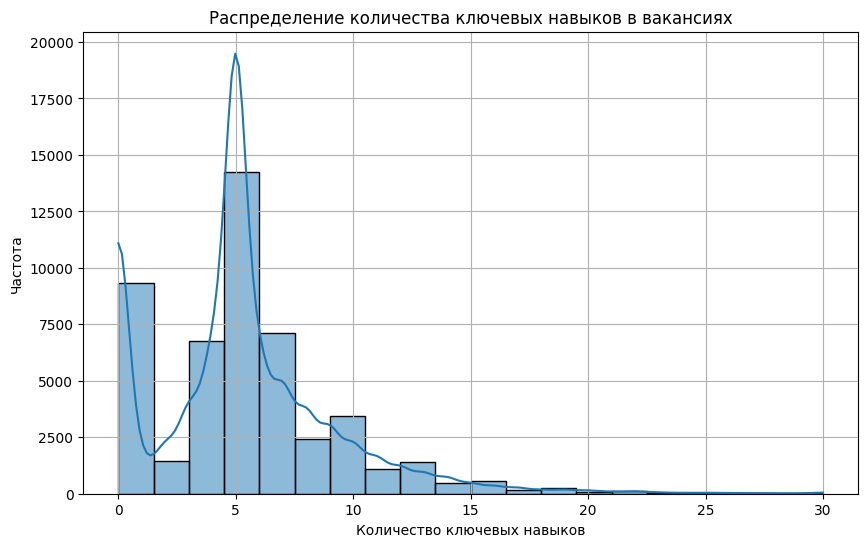

In [ ]:
### Вывод

import matplotlib.pyplot as plt
import seaborn as sns

# Построим график распределения количества навыков
plt.figure(figsize=(10, 6))
sns.histplot(df['key_skills_count'], bins=20, kde=True)
plt.title('Распределение количества ключевых навыков в вакансиях')
plt.xlabel('Количество ключевых навыков')
plt.ylabel('Частота')
plt.grid()
plt.show()

6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в среднем указывают для каждого типа требуемого опыта (уникальное значение из поля `experience`).

    При решении задачи примите во внимание следующее:
    1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
    2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
    3. Если в расчётах участвует `null`, в результате он тоже даст `null` (посмотрите, что возвращает запрос `select 1 + null`). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит `null` на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

    Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до **целого числа**.

Error executing query: sqlalchemy.cyextension.immutabledict.immutabledict is not a sequence

Выводы по средней заработной плате в зависимости от опыта работы можно увидеть в таблице и награфике ниже:
           experience  avg_salary
0           Нет опыта     74643.0
1  От 1 года до 3 лет    139675.0
2       От 3 до 6 лет    243115.0


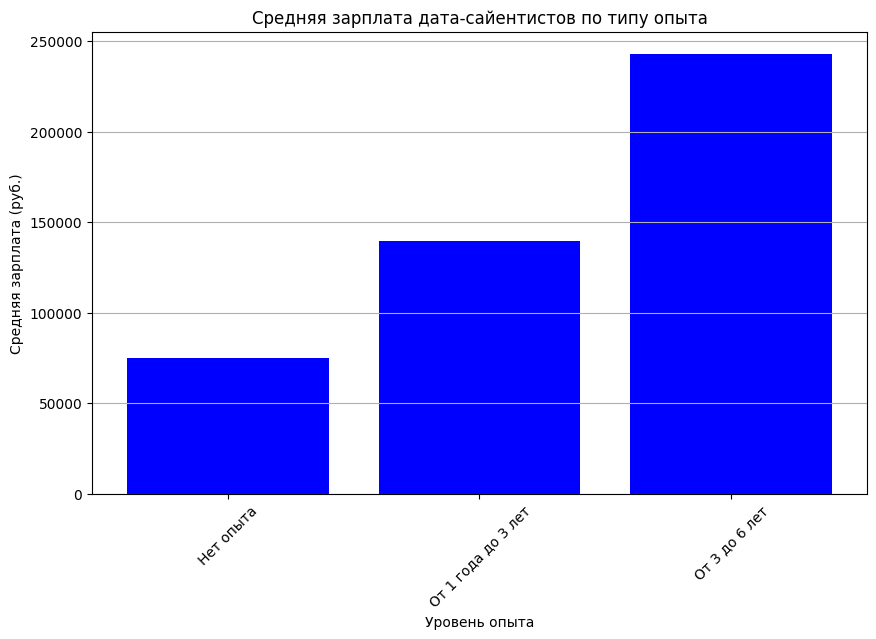

In [ ]:
# Импорт необходимых библиотек

import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Параметры подключения к базе данных
DBNAME = 'project_sql'
USER = 'skillfactory'
PASSWORD = 'cCkxxLVrDE8EbvjueeMedPKt'
HOST = '84.201.134.129'
PORT = 5432

# Создание соединения с базой данных с помощью SQLAlchemy
engine = create_engine(f'postgresql://{USER}:{PASSWORD}@{HOST}:{PORT}/{DBNAME}')

# SQL-запрос для получения средней зарплаты по типу опыта для вакансий дата-сайентистов
query = """
    SELECT experience,
           ROUND(AVG((COALESCE(salary_from, 0) + COALESCE(salary_to, 0)) /
           NULLIF((CASE WHEN salary_from IS NOT NULL AND salary_to IS NOT NULL THEN 2 ELSE 1 END)))::int) AS avg_salary
    FROM public.vacancies
    WHERE (LOWER(name) LIKE '%data scientist%'
   OR LOWER(name) LIKE '%data science%'
   OR LOWER(name) LIKE '%исследователь данных%'
   OR (LOWER(name) LIKE '%ml%' AND LOWER(name) NOT LIKE '%html%')
   OR LOWER(name) LIKE '%machine learning%'
   OR LOWER(name) LIKE '%машинн%обучен%')
   AND (salary_from IS NOT NULL OR salary_to IS NOT NULL)
    GROUP BY experience
    ORDER BY experience;
"""

# Выполнение запроса и преобразование результата в DataFrame
try:
    df_salary = pd.read_sql_query(query, engine)
except Exception as e:
    print(f"Error executing query: {e}")

# Закрытие соединения с базой данных
engine.dispose()

# Проверяем, есть ли данные в df_salary перед выводом
if not df_salary.empty:
    # Вывод результатов на печать в цифровом и текстовом виде
    print()
    print("Выводы по средней заработной плате в зависимости от опыта работы можно увидеть в таблице и награфике ниже:")
    print(df_salary)

    # Визуализация данных
    plt.figure(figsize=(10, 6))
    plt.bar(df_salary['experience'], df_salary['avg_salary'], color='blue')
    plt.title('Средняя зарплата дата-сайентистов по типу опыта')
    plt.xlabel('Уровень опыта')
    plt.ylabel('Средняя зарплата (руб.)')
    plt.xticks(rotation=45)
    plt.grid(axis='y')

    # Показ графика
    plt.show()
else:
    print("Нет данных для отображения.")


В результате анализа средней заработной платы по уровню опыта получили следующие данные

***

## **ВЫВОДЫ по разделу 6. ПРЕДМЕТНЫЙ АНАЛИЗ**

6.1. В задании Рассмотрено сколько вакансий имеет отношение к исследованию данных.
Результат: Количество вакансий, имеющих отношение к данным: 1771
В данном случае мы рассматриваем вакансии, которые явно связаны с данными. Число 1771 вакансий указывает на наличие обширного рынка труда для специалистов в области данных, что создает хорошие возможности для соискателей. Это говорит о растущем интересе компаний к аналитике данных и искусственному интеллекту. Следует отметить, что многие вакансии могут покрывать широкий спектр ролей в компании, начиная от аналитиков данных до исследователей данных.

6.2. Определено сколько есть подходящих вакансий для начинающего дата-сайентиста.
Результат: Количество подходящих вакансий для начинающего дата-сайентиста: 51
Наличие всего 51 вакансии для начинающего дата-сайентиста, это говорит о высокой конкуренции на позиции начального уровня. Факторы, такие как требования работодателей к опыту и наличию определенных навыков, могут снижать количество вакансий, подходящих для новичков. Это также может подчеркивать необходимость дополнительных курсов или обучения для соискателей, заинтересованных в этой области.

6.3. Рассчитано сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или Postgres.
Результат: Количество вакансий для дата-сайентистов, в которых указан SQL или Postgres: 229
При наличии 229 вакансий с указанием SQL или Postgres как ключевых навыков, можно сделать вывод, что эти инструменты являются основополагающими для работы дата-сайентистов. Это подчеркивает важность знаний работы с базами данных, так как обработка и анализ данных часто требуют использования SQL.

6.4. Определено, насколько популярен Python в требованиях работодателей к DS.
Результат: Количество вакансий для дата-сайентистов, в которых указан Python: 357
При наличии 357 вакансий, которые требуют знания Python, очевидно, что этот язык программирования является стандартом для дата-сайентистов. Python широко используется в аналитике данных, машинном обучении и большинстве современных проектов, связанных с данными, что делает его необходимым навыком для соискателей.

6.5. Рассчитано сколько ключевых навыков в среднем указывают в вакансиях для DS?
Результат: Среднее количество ключевых навыков в вакансиях для дата-сайентистов: 6.41
Указание в среднем более 6 ключевых навыков в вакансиях предполагает высокие требования к соискателям. Это сигнализирует о том, что необходимо изучить самые востребованные ключевые навыки, чтобы быть конкурнетоспособным на рынке труда.

6.6. Создан запрос, позволяющий вычислить, какую зарплату для DS в среднем указывают для каждого типа требуемого опыта.

Результат:
1. Нет опыта: 74643.0
2. От 1 года до 3 лет: 139675.0
3. От 3 до 6 лет: 243115.0

Данные показывают значительный рост зарплаты с увеличением опыта работы. Особенно заметен скачок между категориями "От 1 года до 3 лет" и "От 3 до 6 лет", что может указывать на высокую ценность специалистов с более глубокими знаниями и навыками. Эти данные подчеркивают важность накопления опыта, который положительно влияет на уровень вознаграждения и карьерные возможности в области науки о данных.


# **Общий вывод по проекту**

В рамках данного проекта была проведена всесторонняя аналитика данных, связанная с вакансиями для специалистов в области данных, в частности, дата-сайентистов. На протяжении всех разделов мы исследовали различные аспекты, включая количество вакансий, требования к навыкам, уровни опыта и средние зарплаты.


Основные результаты и выводы:

1. Общее количество вакансий: Анализ показал, что существует значительное число вакансий, относящихся к области данных (1771). Это свидетельствует о высоком спросе на специалистов в этой области.
2. Требования для начинающих: Оказалось, что для новичков, желающих войти в сферу как дата-сайентисты, доступно только 51 вакансия. Это подчеркивает необходимость дополнительного обучения и подготовки и трудностях для вхождения новичков в профессию. Вероятно уровень зарплаты для новичков будет снижаться (в Краснодаре уже берут на стажировку за 15000 рублей или бесплатно для портфолио)
3. Распределение навыков: SQL и Python оказались ключевыми навыками для успешной карьеры. Количество вакансий, требующих этих навыков, достаточно высоко, что подтверждает их важность в профессии.
4. Ключевые навыки: Среднее количество ключевых навыков (6.41) также указывает на то, что работодатели хотят видеть в кандидате комплексный набор компетенций, как технических, так и мягких.
5. Зарплатные ожидания: Средние зарплаты для дата-сайентистов растут с увеличением опыта, причем особенно значительный скачок наблюдается на уровне от 1 до 3 лет опыта. Это определяет важность профессионального роста и накопления опыта для повышения зарплаты.

Дополнительные исследования данных
1. Анализ регионального распределения вакансий:
Проведение анализа по регионам для выявления географических тенденций в доступности вакансий. Это позволит понять, в каких регионах возрастает спрос на специалистов в области данных и какие регионы могут быть идентифицированы как наиболее перспективные для поиска работы.

2. Исследование влияния уровня образования на зарплату:
Анализ данных по уровню образованию и сравнению с запрашиваемыми зарплатами для выявления связи между уровнем образования и зарплатными ожиданиями.

3. Анализ трендов в требованиях к навыкам:
Проведение временного анализа на основании данных по вакансиям для выявления, как меняются требования к знаниям и навыкам в профессии. Это может помочь подготовить соискателей к актуальным знаниям, необходимым для успешного трудоустройства.

4. Прогнозирование роста вакансий:
Использование методов машинного обучения для прогнозирования числа вакансий для дата-сайентистов в будущем. Исходя из текущего тренда роста, можно ожидать увеличение потребности в таких специалистах.

Варианты продолжения исследования

1. Разработка системы рекомендаций: Создание модели на основе машинного обучения для рекомендации курсов или программ обучения для желающих стать дата-сайентистами исходя из актуальных потребностей рынка.
2. Глубокий анализ зарплатных ожиданий: Расширение исследования, включающее более глубокий анализ зарплат по специфическим сферам и подкатегориям, чтобы помочь выпускникам вузов и профессионалам лучше ориентироваться в возможностях заработка.
3. Создание интерактивного дашборда: Разработка визуализированного дашборда, где пользователи смогут исследовать данные по вакансиям, зарплатам и требованиям к навыкам, что обеспечит пользователей более быстрым доступом к необходимой информации.

Заключение

Проект продемонстрировал разнообразие и динамичность рынка труда для дата-сайентистов, обозначил ключевые навыки и требования, которые актуальны для успеха в этой области, и предоставил широкие возможности для дальнейших исследований и развития. Продолжая данное исследование, можно значительно углубить понимание этого рынка и предоставить полезные рекомендации для соискателей и компаний.
